Importing neccessary libraries

In [2]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt
print('Imported successfully')

Imported successfully


Generate Signal (with or without noise)

In [3]:
def generate_signal(tm, noise_flag=True):
    # Define frequencies for the sinusoidal components of the signal
    F1 = 1  # Frequency of the first sinusoidal component
    F2 = 10  # Frequency of the second sinusoidal component
    
    # Generate the signal as a sum of two sinusoidal components
    x = (2 * np.sin(2 * np.pi * F1 * tm)) + (4 * np.sin(2 * np.pi * F2 * tm))
    
    # Add noise to the signal if noise_flag is True
    if noise_flag:
        x += (3 * np.random.randn(tm.size))  # Add noise using random values
        print('Noise added')  # Print a message indicating noise addition
    
    return x  # Return the generated signal




Select Parameters

In [4]:
# Define the sampling frequency (Fs) and frequency increment (delF)
Fs = 40
delF = 0.266 #0.0780

# Calculate the number of samples (N) based on Fs and delF
N = int(Fs / delF)
print(N)

# Calculate the duration of each sample (Tw) in seconds
Tw = N / Fs

# Generate an array of time values (t) from 0 to Tw with N samples
t = np.linspace(0, Tw, num=N)

# Generate the signal using the generate_signal function
signal = generate_signal(t,False)

# Print a message indicating the duration of the generated signal
print('Signal generated of duration {} sec'.format(Tw))


150
Signal generated of duration 3.75 sec


Compute Spectrum

In [26]:
# Compute the Fast Fourier Transform (FFT) of the signal to obtain the spectrum
spectrum = fft(signal)

# Generate an array of frequencies associated with the FFT result
F = fftfreq(N, 1/Fs)

# Select only the non-negative frequencies (Frequencies >= 0)
Fpositive = np.where(F >= 0)

# Print the shape of the frequency array (F)
print(F.shape)

# Print the type of the array that holds the non-negative frequencies (Fpositive)
print(type(Fpositive))

# Print the shape of the spectrum (FFT result)
print(spectrum.shape)

# Print the indices of the non-negative frequencies (Frequencies >= 0)
print(Fpositive)


(150,)
<class 'tuple'>
(150,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74]),)


Plot Signal and Spectrum

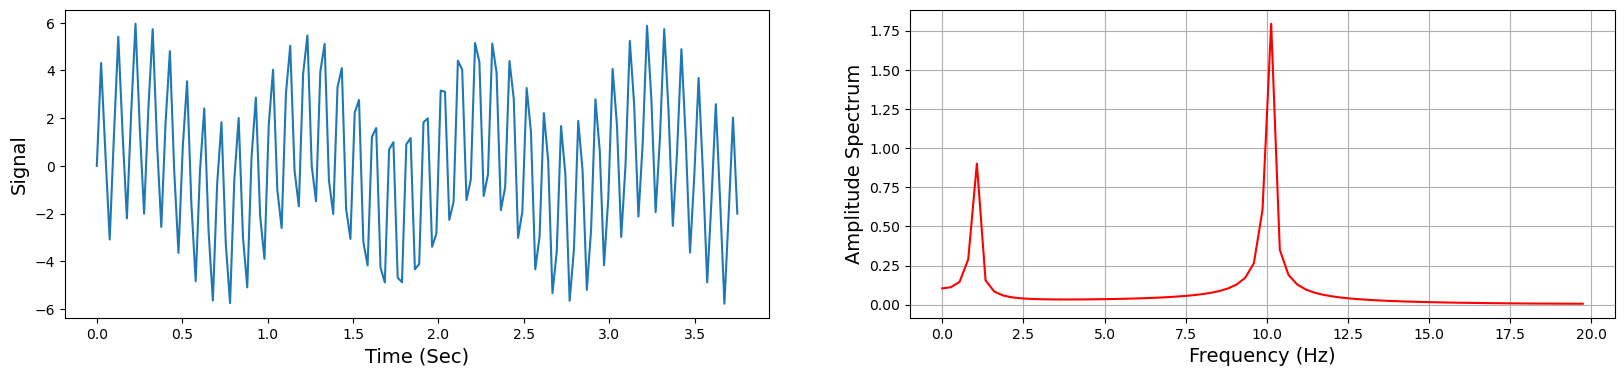

In [27]:
# Plotting the Signal and Spectrum
plt.figure(figsize=(20, 4))  # Set the figure size

# Plot the signal in the first subplot
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and index 1
plt.plot(t, signal)  # Plot the signal
plt.xlabel('Time (Sec)', fontsize=14)  # Label for the x-axis (time)
plt.ylabel('Signal', fontsize=14)  # Label for the y-axis (signal)

# Plot the amplitude spectrum in the second subplot
plt.subplot(1, 2, 2)  # Create a subplot with 1 row, 2 columns, and index 2
plt.plot(F[Fpositive], np.absolute(spectrum[Fpositive]) / N, color='r')  # Plot the amplitude spectrum
plt.xlabel('Frequency (Hz)', fontsize=14)  # Label for the x-axis (frequency)
plt.ylabel('Amplitude Spectrum', fontsize=14)  # Label for the y-axis (amplitude spectrum)
plt.grid()  # Add gridlines to the plot


Frequency Domain Filtering

In [19]:
# Frequency Thresholding
freq_thr = 2  # Set the frequency threshold

# Apply frequency thresholding to the spectrum
spectrum_filter = spectrum * (np.absolute(F) < freq_thr)

# Apply Inverse FFT to obtain the filtered signal
signal_filter = ifft(spectrum_filter)

# Compute the spectrum of the filtered signal
spectrum_output = fft(signal_filter)


Plot Filter Data and Spectrum

Text(0, 0.5, 'Spectrum')

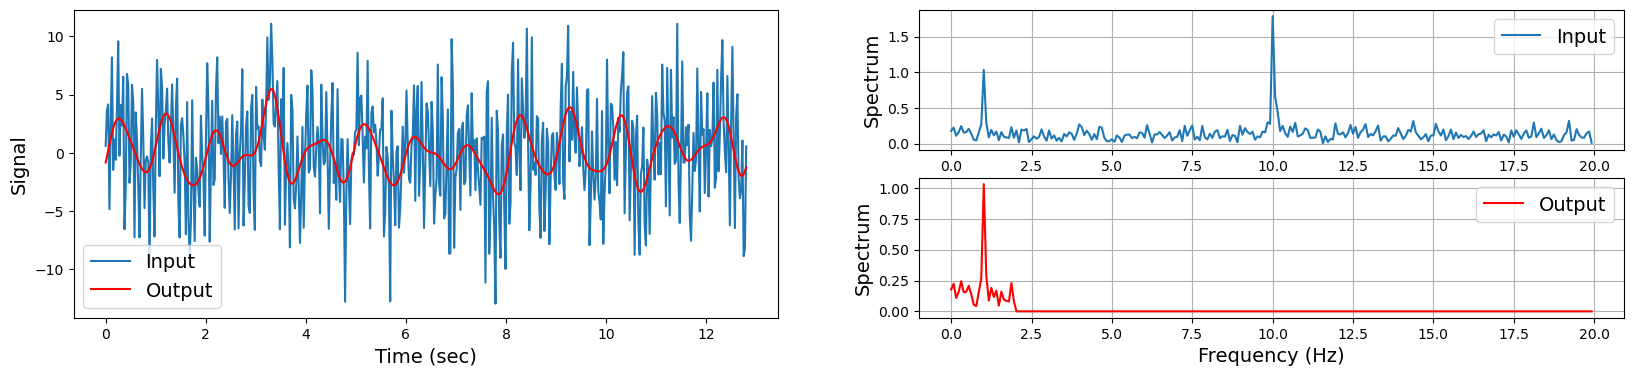

In [20]:
# Plotting Filter Data & Spectrum
fig = plt.figure(figsize=(20, 4))  # Set up the main figure

# Create a 2x2 grid of subplots
gs = fig.add_gridspec(2, 2)

# Assign subplots to specific positions in the grid
ax1 = fig.add_subplot(gs[:, 0])  # Subplot for the signal plot
ax2 = fig.add_subplot(gs[0, 1])  # Subplot for the input spectrum plot
ax3 = fig.add_subplot(gs[1, 1])  # Subplot for the output spectrum plot

# Plot the input signal and the filtered signal in the first subplot
ax1.plot(t, signal, label='Input')  # Plot the input signal
ax1.plot(t, signal_filter.real, color='r', label='Output')  # Plot the filtered signal
ax1.legend(fontsize=14)  # Add a legend for the signals
ax1.set_xlabel('Time (sec)', fontsize=14)  # Label for the x-axis (time)
ax1.set_ylabel('Signal', fontsize=14)  # Label for the y-axis (signal)

# Plot the input spectrum in the second subplot
ax2.plot(F[Fpositive], np.absolute(spectrum[Fpositive]) / N, label='Input')  # Plot the input spectrum
ax2.grid()  # Add gridlines to the plot
ax2.legend(fontsize=14)  # Add a legend for the spectrum
ax2.set_xlabel('Frequency (Hz)', fontsize=14)  # Label for the x-axis (frequency)
ax2.set_ylabel('Spectrum', fontsize=14)  # Label for the y-axis (spectrum)

# Plot the output spectrum in the third subplot
ax3.plot(F[Fpositive], np.absolute(spectrum_output[Fpositive]) / N, color='r', label='Output')  # Plot the output spectrum
ax3.grid()  # Add gridlines to the plot
ax3.legend(fontsize=14)  # Add a legend for the spectrum
ax3.set_xlabel('Frequency (Hz)', fontsize=14)  # Label for the x-axis (frequency)
ax3.set_ylabel('Spectrum', fontsize=14)  # Label for the y-axis (spectrum)
